In [5]:
from topic_specificity import calculate_specificity_for_all_topics
import pickle
from Preprocessing.wsj import WSJ
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt

In [6]:
 # 1. Load model and corpus
dictionary = pickle.load(open('Results/LDA/wsj_dictionary.dict','rb'))
corpus = pickle.load(open('Results/LDA/wsj_corpus.pkl','rb'))
lda = LdaModel.load("Results/LDA/wsj_lda50.model")


In [7]:
type(lda)

gensim.models.ldamodel.LdaModel

In [14]:
specificity_scores = calculate_specificity_for_all_topics(
    model=lda,
    corpus=corpus,
    mode='lda',
    threshold_mode='gmm',         # options: 'median', 'percentile', 'gmm'
    specificity_mode='sqrt'       # options: 'diff', 'sqrt'
)

print("Specificity scores:", specificity_scores)

Specificity scores: [0.06080790621705775, 0.18033200856295975, 0.12080747783221257, 0.1674053265688983, 0.17728299824116758, 0.11576138184950105, 0.21782436242200537, 0.05088413523800948, 0.1502230220449407, 0.09512413529435623, 0.055538471922098265, 0.13841946601191674, 0.25314428081589396, 0.19117306651776142, 0.08244706322388431, 0.12442253021654277, 0.2943706666148517, 0.06160855666229074, 0.17667183960751717, 0.1118678466896711, 0.20945858879881354, 0.1112054204716405, 0.10021600524221073, 0.31840721414776896, 0.14042723170540558, 0.18214496788731846, 0.09381491952288701, 0.17147312871392842, 0.16655990500729934, 0.13660291376816955, 0.1236938023054045, 0.1229624092610205, 0.10568100434757875, 0.2074019507572015, 0.24323512484902954, 0.26869006287642067, 0.16057193662116775, 0.13335188624771113, 0.0873713077098083, 0.15501431713853567, 0.14585011948444895, 0.0802564759318451, 0.10022946288407028, 0.24450511679368817, 0.09991002377319222, 0.1309955046033775, 0.14017441656216, 0.141

In [15]:
mappings = pickle.load(open('Results/wsj_repllama_lda_mapping.pkl','rb'))

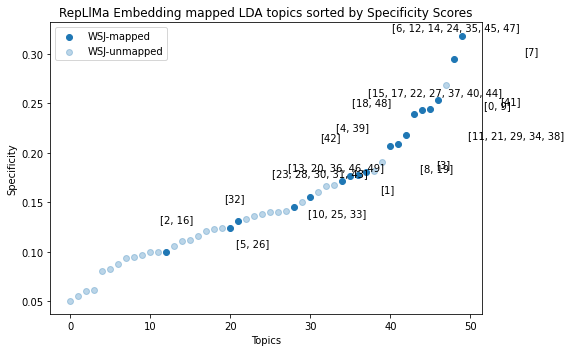

In [30]:
annotated = True
# Extract set of topics that have at least one mapped feature
mapped_topics = {topic_id for _, topic_id in mappings}

# Extract each mapped list
mapped_features = {topic_id:[feature_id for feature_id, topic in mappings if topic == topic_id] for topic_id in mapped_topics}

# Pair topic IDs with their specificity scores
topic_scores = list(enumerate(specificity_scores))

# Sort by specificity score (low to high)
sorted_topic_scores = sorted(topic_scores, key=lambda x: x[1])
sorted_topics, sorted_scores = zip(*sorted_topic_scores)

# X positions for plotting
x_positions = list(range(len(sorted_topics)))

# Split into mapped vs. unmapped
mapped_x = [x for x, t in zip(x_positions, sorted_topics) if t in mapped_topics]
mapped_y = [s for t, s in zip(sorted_topics, sorted_scores) if t in mapped_topics]

unmapped_x = [x for x, t in zip(x_positions, sorted_topics) if t not in mapped_topics]
unmapped_y = [s for t, s in zip(sorted_topics, sorted_scores) if t not in mapped_topics]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mapped_x, mapped_y, color='C0', alpha=1.0, label='WSJ-mapped')
plt.scatter(unmapped_x, unmapped_y, color='C0', alpha=0.3, label='WSJ-unmapped')
if annotated:
    # Annotate mapped features
    sorted_m_t = [t for x, t in zip(x_positions, sorted_topics) if t in mapped_topics]
    for i in range(len(sorted_m_t)):
        plt.annotate(
        str(mapped_features[sorted_m_t[i]]),              # text you want to display
        (mapped_x[i], mapped_y[i]),           # the data point coordinates
        textcoords='offset points',  # interpret xytext offset in points
        xytext=(70*(-1)**i, 5),      # shift text 5 points right and up
        ha='left'           # left-align text relative to the point
    )

plt.xlabel('Topics')
plt.ylabel('Specificity')
plt.legend()
plt.title('RepLlMa Embedding mapped LDA topics sorted by Specificity Scores')
plt.tight_layout()
plt.savefig('Results/wsj_repllama.pdf')
plt.show()


In [21]:

# Extract each mapped list
mapped_features = {topic_id:[feature_id for feature_id, topic in mappings if topic == topic_id] for topic_id in mapped_topics}
mapped_features

{1: [3],
 34: [18, 48],
 33: [42],
 4: [13, 20, 36, 46, 49],
 6: [4, 39],
 39: [1],
 40: [32],
 42: [5, 26],
 43: [41],
 12: [15, 17, 22, 27, 37, 40, 44],
 45: [10, 25, 33],
 15: [2, 16],
 16: [7],
 49: [0, 9],
 18: [8, 19],
 20: [11, 21, 29, 34, 38],
 23: [6, 12, 14, 24, 35, 45, 47],
 27: [23, 28, 30, 31, 43]}